This runs and displays benchmark performance for various tools

In [1]:
%cd twitteranalysis
%run -i environment.py

import pandas as pd
#Plotting 
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Timing etc tools (e.g., @timefn)
from OptimizationTools import *


(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


In [2]:
# numberUsersProcessed = 100
numberUsersProcessed = 4352

actualUsers = 1328927

In [3]:

BASE = os.getenv("HOME")
# todo restore environment
# from TwitterDataAnalysis.environment import *

# Logging
LOG_FOLDER_PATH = "%s/Desktop/TwitterDataAnalysisLogs" % BASE

query_log = '%s/query_log.csv' % LOG_FOLDER_PATH
query_time_log = '%s/query_time_log.csv' % LOG_FOLDER_PATH


request_log = '%s/request_log.csv' % LOG_FOLDER_PATH
request_time_log = '%s/request_time_log.csv' % LOG_FOLDER_PATH


def r(x):
    if x[0] == '0':
        x = '2%s' % x 
    return pd.to_datetime(x)

queries = pd.read_csv(query_log,  header=None, names=['runtime'])
query_timestamps = pd.read_csv(query_time_log,  header=None, names=['runTimestamp'])
query_timestamps = query_timestamps.apply(lambda x: r(x.runTimestamp), axis=1)
queries.dropna(inplace=True)

requests = pd.read_csv(request_log,  header=None, names=['runtime'])
request_timestamps = pd.read_csv(request_time_log,  header=None, names=['runTimestamp'])
request_timestamps = request_timestamps.apply(lambda x: r(x.runTimestamp), axis=1)
requests.dropna(inplace=True)

# DB query log

In [4]:
totalSeconds = queries.runtime.sum()
meanRuntime = queries.runtime.mean()
totalRecords = len(queries)
print("Made %s queries in %s seconds (%s minutes). " %(totalRecords, totalSeconds, totalSeconds/60))

Made 164 queries in 0.25013756752 seconds (0.00416895945867 minutes). 


In [5]:
queriesPerUser = len(queries) / numberUsersProcessed 
print("%s queries per user" % queriesPerUser)
estQueryTime = queriesPerUser * meanRuntime * actualUsers
estQueryTime

0.03768382352941176 queries per user


76.382023711360105

In [6]:
elapsedTime = query_timestamps.max() -query_timestamps.min()
elapsedTime

Timedelta('0 days 00:00:15.393389')

In [7]:
queries.describe()

,runtime
count,164.000000
mean,0.001525
std,0.001393
min,0.000236
25%,0.000343
50%,0.000476
75%,0.002783
max,0.004885


In [ ]:
sns.boxplot(queries)

In [10]:
queries[:4]

,runtime
0,0.004345
1,0.004272
2,0.004589
3,0.004474


In [9]:
totalEstTime = queries.index.max() - queries.index.min()
actualUsers * (totalEstTime / numberUsersProcessed)

49773.69048713235

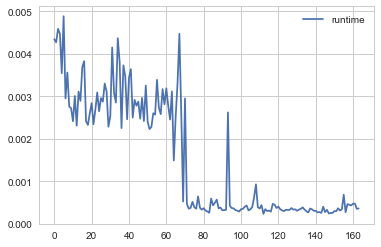

In [11]:
queries.plot()

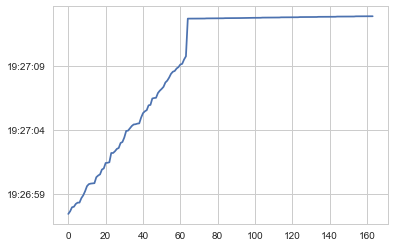

In [12]:
query_timestamps.T.plot()

In [ ]:
d = queries[:50]
d = d.reset_index()

In [ ]:
d.runTimestamp[0]

# Request time logs

In [ ]:
totalSeconds = requests.runtime.sum()
meanRuntime = requests.runtime.mean()
totalRecords = len(requests)
print("Handled %s requests in %s seconds (%s minutes). " %(totalRecords, totalSeconds, totalSeconds/60))

In [ ]:
requests.describe()

In [ ]:
avgRequestsPerUser = totalRecords / numberUsersProcessed
print("Average requests per user %s" % avgRequestsPerUser)

expectedRequests = totalUsers * avgRequestsPerUser
print("Estimated number of requests required: %s" % round(expectedRequests))
expRun = expectedRequests * meanRuntime 
print("Expected runtime: %s hours" % (expRun / 60))

In [ ]:
requests.plot()

In [ ]:
request_timestamps.T.plot()

In [ ]:
elapsedTime = request_timestamps.max() - request_timestamps.min()
elapsedTime

In [ ]:
totalTime = requests.runtime.sum()
totalTime

It took 1 minute to process 4352 users, how many minutes to process all?

In [ ]:
(actualUsers / numberUsersProcessed) / 60

# Benchmark tweet text processing tools

In [ ]:
%cd twitteranalysis

%run -i profiling/optimizing_string_processor.py

# Display results of benchmark runs

## String processing worker with different datastructures

In [ ]:


NUMTWEETS = 1181

def a(row):
    #correct experiment which iterated over the string
    if len(row.dataStructure) == 1:
        row.dataStructure = 'tuple'
        
    if row.tweetTime > 1 or row.numTweets > NUMTWEETS:
        row.tweetTime = row.totalTime / NUMTWEETS
    return row



#load from file
data = pd.read_csv("%s/tests/benchmarks/StringProcessingWorker.csv" % TEXT_TOOLS_PATH)
data.set_index(['id'], inplace=True)
#fix incorrectly calculated tweet times
data = data.apply(lambda x: a(x), axis=1)
#get rid of outliers from pycharm indexing
data = data[data.totalTime < 80]
data.drop(['module', 'note', 'timestamp'], axis=1, inplace=True)
len(data)

In [ ]:
fig, ax = plt.subplots(2)
# sns.boxplot(data=data[['totalTime', 'tweetTime']], orient='h', ax=ax[0])
sns.boxplot(data=data.totalTime, orient='h', ax=ax[0])
sns.boxplot(data=data.tweetTime, orient='h', ax=ax[1])
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(2, figsize=(12,6))
sns.boxplot(x="numThreads", y="totalTime", hue="dataStructure", data=data, ax=ax[0])
sns.boxplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data, ax=ax[1])

In [ ]:

import matplotlib.ticker as ticker
# sns.set_style( {'xtick.major.size': 5.0})
g = sns.violinplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data)
# g.set_xticklabels([i for i in range(0, 50, 5)])
# g.set(xticklabels=[i for i in range(0, 50, 5)])
# g.xaxis.set_major_locator(ticker.MultipleLocator(5))
# f = plt.gcf().get_axes()[0]
# f.set_xticks(5)

In [ ]:
fig, ax = plt.subplots(2)
sns.distplot(data.totalTime, kde=True, rug=True, ax=ax[0])
sns.distplot(data.tweetTime, kde=True, rug=True, ax=ax[1])
fig.tight_layout()

In [ ]:
import sys
sys.byteorder

In [ ]:
sns.factorplot(x="numThreads", y="totalTime", hue="dataStructure", data=data) #, kind="swarm") #, ax=axes[0])
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.tight_layout()
# fig.get_axes()[0].set_ylim(0.025,0.04)

In [ ]:
sns.factorplot(x="numThreads", y="tweetTime", hue="dataStructure", data=data) #,ax=axes[1]);
fig = plt.gcf()
fig.set_size_inches(12,4)
fig.get_axes()[0].set_ylim(0.028,0.032)
fig.tight_layout()